<a href="https://colab.research.google.com/github/Mudabber-Raza/ML/blob/main/Cricket%20World%20Cup%202023%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#World Cup 2023 predicition model (based on performance of the playing teams since 2020)

By: Mudabber Raza

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url1 = 'https://www.espncricinfo.com/records/year/team-match-results/2023-2023/one-day-internationals-2'
url2 = 'https://www.espncricinfo.com/records/year/team-match-results/2022-2022/one-day-internationals-2'
url3 = 'https://www.espncricinfo.com/records/year/team-match-results/2021-2021/one-day-internationals-2'
url4 = 'https://www.espncricinfo.com/records/year/team-match-results/2020-2020/one-day-internationals-2'

url5= 'https://www.icc-cricket.com/rankings/mens/team-rankings/odi'

url6= 'https://www.espncricinfo.com/rankings/content/page/211271.html'

url7 = 'https://www.icccricketschedule.com/2023-cricket-world-cup-schedule/'

year2023Data = pd.read_html(url1)
year2022Data = pd.read_html(url2)
year2021Data = pd.read_html(url3)
year2020Data = pd.read_html(url4)

team_rankings= pd.read_html(url5)

team_rankings1 = pd.read_html(url6)

fixtures = pd.read_html(url7)

fixtures = fixtures[2]



# creating dataframes
df1 = pd.DataFrame(year2023Data[0], columns = ["Team 1", "Team 2", "Winner", "Margin", "Ground", "Match Date", "Scorecard"])

df2 = pd.DataFrame(year2022Data[0], columns = ["Team 1", "Team 2", "Winner", "Margin", "Ground", "Match Date", "Scorecard"])

df3 = pd.DataFrame(year2021Data[0], columns = ["Team 1", "Team 2", "Winner", "Margin", "Ground", "Match Date", "Scorecard"])

df4 = pd.DataFrame(year2020Data[0], columns = ["Team 1", "Team 2", "Winner", "Margin", "Ground", "Match Date", "Scorecard"])

#df5= pd.DataFrame(fixtures[0], columns = ["Date", "Team A", "Team B", "Venue", "Time IST", "Winner Team"])


data = {
    'Rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Team': ['Australia', 'Pakistan', 'India', 'New Zealand', 'England', 'South Africa', 'Bangladesh',
             'Afghanistan', 'Sri Lanka', 'West Indies', 'Zimbabwe', 'Scotland', 'Ireland', 'Netherlands',
             'Nepal', 'Namibia', 'USA', 'Oman', 'UAE', 'PNG'],
    'Matches': [23, 20, 33, 27, 24, 19, 28, 16, 32, 35, 30, 33, 24, 28, 40, 28, 31, 24, 41, 28],
    'Points': [2714, 2316, 3807, 2806, 2426, 1910, 2661, 1404, 2794, 2312, 1641, 1662, 1052, 1044, 1396, 813,
               808, 525, 617, 106],
    'Rating': [118, 116, 115, 104, 101, 101, 95, 88, 87, 66, 55, 50, 44, 37, 35, 29, 26, 22, 15, 4]
}

ranks = pd.DataFrame(data)

df1= df1.loc[::-1]
df2= df2.loc[::-1]
df3= df3.loc[::-1]

#concating dataframes
results = pd.concat([df1,df2,df3,df4], ignore_index=True)

results.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,Pakistan,Nepal,Pakistan,238 runs,Multan (1597),"Aug 30, 2023",ODI # 4628
1,Afghanistan,Pakistan,Pakistan,59 runs,Colombo (RPS) (1004),"Aug 26, 2023",ODI # 4627
2,Afghanistan,Pakistan,Pakistan,1 wicket,Hambantota (2502),"Aug 24, 2023",ODI # 4626
3,Afghanistan,Pakistan,Pakistan,142 runs,Hambantota (2502),"Aug 22, 2023",ODI # 4625
4,West Indies,India,India,200 runs,Tarouba (2041),"Aug 1, 2023",ODI # 4624


In [3]:
# testing data
df = results[(results['Team 1'] == 'Pakistan') | (results['Team 2'] == 'India')]
teams = df.iloc[:]
teams.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,Pakistan,Nepal,Pakistan,238 runs,Multan (1597),"Aug 30, 2023",ODI # 4628
4,West Indies,India,India,200 runs,Tarouba (2041),"Aug 1, 2023",ODI # 4624
5,West Indies,India,West Indies,6 wickets,Bridgetown (199),"Jul 29, 2023",ODI # 4623
6,West Indies,India,India,5 wickets,Bridgetown (199),"Jul 27, 2023",ODI # 4622
53,Pakistan,New Zealand,New Zealand,47 runs,Karachi (487),"May 7, 2023",ODI # 4575


In [4]:
#selecting matches of teams playing in world cup

worldcup_teams = ['England', 'South Africa', 'Netherlands','Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 'Australia', 'Bangladesh', 'India']
df_teams_1 = results[results['Team 1'].isin(worldcup_teams)]
df_teams_2 = results[results['Team 2'].isin (worldcup_teams)]
df_teams = pd.concat((df_teams_1, df_teams_2), ignore_index=True)
df_teams.drop_duplicates()
df_teams.count()

Team 1        369
Team 2        369
Winner        369
Margin        369
Ground        369
Match Date    369
Scorecard     369
dtype: int64

In [5]:
df_teams.head()


,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,Pakistan,Nepal,Pakistan,238 runs,Multan (1597),"Aug 30, 2023",ODI # 4628
1,Afghanistan,Pakistan,Pakistan,59 runs,Colombo (RPS) (1004),"Aug 26, 2023",ODI # 4627
2,Afghanistan,Pakistan,Pakistan,1 wicket,Hambantota (2502),"Aug 24, 2023",ODI # 4626
3,Afghanistan,Pakistan,Pakistan,142 runs,Hambantota (2502),"Aug 22, 2023",ODI # 4625
4,Bangladesh,Afghanistan,Bangladesh,7 wickets,Chattogram (1931),"Jul 11, 2023",ODI # 4621


In [6]:
#dropping unnecessary columns
teams = df_teams.drop(['Match Date','Ground', 'Margin', 'Scorecard'], axis=1)
teams.head()

,Team 1,Team 2,Winner
0,Pakistan,Nepal,Pakistan
1,Afghanistan,Pakistan,Pakistan
2,Afghanistan,Pakistan,Pakistan
3,Afghanistan,Pakistan,Pakistan
4,Bangladesh,Afghanistan,Bangladesh


In [7]:
#dropping matches which were tied or had no results.
df_team = teams[(teams.Winner != 'no result') & (teams.Winner != 'tied')]
df_team

,Team 1,Team 2,Winner
0,Pakistan,Nepal,Pakistan
1,Afghanistan,Pakistan,Pakistan
2,Afghanistan,Pakistan,Pakistan
3,Afghanistan,Pakistan,Pakistan
4,Bangladesh,Afghanistan,Bangladesh
...,...,...,...
364,England,Australia,England
365,England,Australia,Australia
366,Australia,India,Australia
367,Australia,India,Australia


In [8]:
# Calculate the sum of matches played by each team
matches_played_team1 = df_team['Team 1'].value_counts()
matches_played_team2 = df_team['Team 2'].value_counts()
matches_played = matches_played_team1.add(matches_played_team2, fill_value=0)
matches_played = matches_played.sort_index()

# Calculate the sum of matches won by each team
matches_won = df_team['Winner'].value_counts()
matches_won = matches_won.sort_index()

mean_1 = matches_won/matches_played

# Display the results
print("Matches Played:")
print(matches_played)

print("\nMatches Won:")
print(matches_won)

print("\nAverage winning ratio:")
print(mean_1)


Matches Played:
Afghanistan     40.0
Australia       66.0
Bangladesh      61.0
England         63.0
India           86.0
Ireland         19.0
Nepal            2.0
Netherlands     48.0
New Zealand     61.0
Oman             2.0
Pakistan        52.0
Scotland         5.0
South Africa    58.0
Sri Lanka       71.0
U.A.E.           1.0
U.S.A.           1.0
West Indies     36.0
Zimbabwe        28.0
dtype: float64

Matches Won:
Afghanistan     22
Australia       38
Bangladesh      37
England         34
India           49
Ireland          3
Netherlands      8
New Zealand     36
Pakistan        36
Scotland         1
South Africa    34
Sri Lanka       35
West Indies     10
Zimbabwe         7
Name: Winner, dtype: int64

Average winning ratio:
Afghanistan     0.550000
Australia       0.575758
Bangladesh      0.606557
England         0.539683
India           0.569767
Ireland         0.157895
Nepal                NaN
Netherlands     0.166667
New Zealand     0.590164
Oman                 NaN
Pakistan  

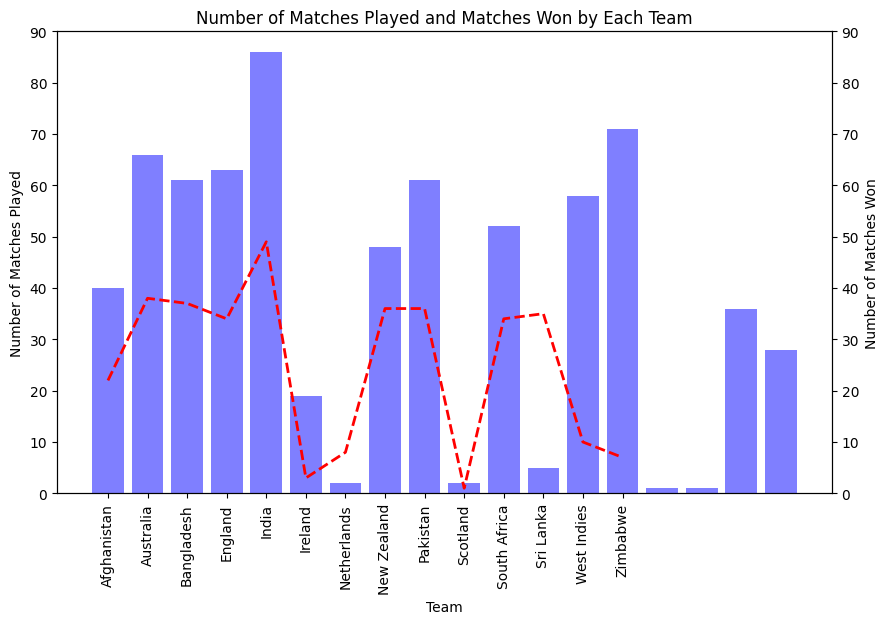

In [9]:
# Creating the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(matches_played.index, matches_played, color='blue', alpha=0.5)
ax1.set_xlabel('Team')
ax1.set_ylabel('Number of Matches Played')
ax1.set_ylim(0, 90)  # Set y-axis limit for matches played
ax1.set_title('Number of Matches Played and Matches Won by Each Team')
ax1.tick_params(axis='x', rotation=90)

# Creating the line plot for matches won
ax2 = ax1.twinx()
ax2.plot(matches_won.index, matches_won, color='red', linestyle='dashed', linewidth=2)
ax2.set_ylabel('Number of Matches Won')
ax2.set_ylim(0, 90)  # Set y-axis limit for matches played


# Displaying the chart
plt.show()

In [10]:
#Adding column 'Count': It will record the team which won the most matches from its previous 50 matches
#(i.e. if Pakistan have won 40 matches from its previous 50 matches and India have won 30 matches than count will select Pakistan)
#'Rank': The team which has higher icc rank will be named in this column
df_team['Count']=0
df_team['Rank']= 0
df_team= df_team.reset_index(drop=True)
df_team.head()

<ipython-input-10-fd7de6fb7dfa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team['Count']=0
<ipython-input-10-fd7de6fb7dfa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team['Rank']= 0


,Team 1,Team 2,Winner,Count,Rank
0,Pakistan,Nepal,Pakistan,0,0
1,Afghanistan,Pakistan,Pakistan,0,0
2,Afghanistan,Pakistan,Pakistan,0,0
3,Afghanistan,Pakistan,Pakistan,0,0
4,Bangladesh,Afghanistan,Bangladesh,0,0


In [11]:
# Filling the 'Count' and 'Rank' columns
for i in range(len(df_team)):
    dt1 = df_team['Team 1'].iloc[i]
    dt2 = df_team['Team 2'].iloc[i]

    # Filtering relevant rows for dt1
    mask_dt1 = (df_team['Team 1'].iloc[i+1:i+50] == dt1) | (df_team['Team 2'].iloc[i+1:i+50] == dt1.rstrip())
    c1 = mask_dt1.sum()
    w1 = (df_team['Winner'].iloc[i+1:i+50][mask_dt1] == dt1.strip()).sum()

    # Filtering relevant rows for dt2
    mask_dt2 = (df_team['Team 1'].iloc[i+1:i+50] == (dt2 + ' ')) | (df_team['Team 2'].iloc[i+1:i+50] == dt2)
    c2 = mask_dt2.sum()
    w2 = (df_team['Winner'].iloc[i+1:i+50][mask_dt2] == dt2.strip()).sum()

    # Updating the 'Count' column
    df_team.loc[i, 'Count'] = dt2 if w2 > w1 else dt1

    # Updating the 'Rank' column
    r1 = ranks.loc[ranks['Team'] == dt1.strip().replace('.', ''), 'Rank'].iloc[0]
    r2 = ranks.loc[ranks['Team'] == dt2.strip().replace('.', ''), 'Rank'].iloc[0]
    df_team.loc[i, 'Rank'] = dt1 if r2 > r1 else dt2


df_team

,Team 1,Team 2,Winner,Count,Rank
0,Pakistan,Nepal,Pakistan,Pakistan,Pakistan
1,Afghanistan,Pakistan,Pakistan,Afghanistan,Pakistan
2,Afghanistan,Pakistan,Pakistan,Afghanistan,Pakistan
3,Afghanistan,Pakistan,Pakistan,Afghanistan,Pakistan
4,Bangladesh,Afghanistan,Bangladesh,Bangladesh,Bangladesh
...,...,...,...,...,...
345,England,Australia,England,Australia,Australia
346,England,Australia,Australia,England,Australia
347,Australia,India,Australia,Australia,Australia
348,Australia,India,Australia,India,Australia


In [12]:
for i in range(len(df_team)):
    dt1 = df_team['Team 1'].iloc[i]
    dt2 = df_team['Team 2'].iloc[i]

    df_team['Team 1'].iloc[i] = 0
    df_team['Team 2'].iloc[i] = 1

    if df_team['Winner'].iloc[i] == dt1.strip():
        df_team['Winner'].iloc[i] = df_team['Team 1'].iloc[i]
    else:
        df_team['Winner'].iloc[i] = df_team['Team 2'].iloc[i]

    if df_team['Count'].iloc[i] == dt1:
        df_team['Count'].iloc[i] = df_team['Team 1'].iloc[i]
    else:
        df_team['Count'].iloc[i] = df_team['Team 2'].iloc[i]

    if df_team['Rank'].iloc[i] == dt1:
        df_team['Rank'].iloc[i] = df_team['Team 1'].iloc[i]
    else:
        df_team['Rank'].iloc[i] = df_team['Team 2'].iloc[i]

df_team


,Team 1,Team 2,Winner,Count,Rank
0,0,1,0,0,0
1,0,1,1,0,1
2,0,1,1,0,1
3,0,1,1,0,1
4,0,1,0,0,0
...,...,...,...,...,...
345,0,1,0,1,1
346,0,1,1,0,1
347,0,1,0,0,0
348,0,1,0,1,0


In [13]:
#fixtures only until league matches

fixtures = fixtures.iloc[0:len(fixtures)-3]
fixtures

,Match No,Date,Team A,Team B,Venue,Time IST,Winner Team,Player of The Match
0,1,"Thursday, 05 October",England,New Zealand,"Narendra Modi Stadium, Ahmedabad",2:00 P.M,NaN,NaN
1,2,"Friday, 06 October",Pakistan,Netherlands,"Rajiv Gandhi International Stadium, Hyderabad",2:00 P.M,NaN,NaN
2,3,"Saturday, 07 October",Bangladesh,Afghanistan,Himachal Pradesh Cricket Association Stadium,10:30 A.M,NaN,NaN
3,4,"Saturday, 07 October",South Africa,Sri Lanka,"Arun Jaitley Stadium, Delhi",2:00 P.M,NaN,NaN
4,5,"Sunday, 08 October",India,Australia,"Chidambaram, Chennai",2:00 P.M,NaN,NaN
5,6,"Monday, 09 October",New Zealand,Netherlands,"Rajiv Gandhi International Stadium, Hyderabad",2:00 P.M,NaN,NaN
6,7,"Tuesday, 10 October",England,Bangladesh,"Himachal Pradesh Cricket Association Stadium, ...",10:30 A.M,NaN,NaN
7,8,"Wednesday, 10 October",Pakistan,Sri Lanka,"Rajiv Gandhi International Stadium, Hyderabad",2:00 P.M,NaN,NaN
8,9,"Thursday, 11 October",India,Afghanistan,"Arun Jaitley Stadium, Delhi",2:00 P.M,NaN,NaN
9,10,"Friday, 12 October",Australia,South Africa,Bharat Ratna Shri Atal Bihari Vajpai Ekana Cri...,2:00 P.M,NaN,NaN


In [14]:
#Dropping the Date,Column1 and Venue columns

for i in range(len(fixtures)-3):
    if (fixtures['Team A'].iloc[i].strip()=="Q1"):
        fixtures['Team A'].iloc[i]="Netherlands "

fixtures.drop(columns=['Date','Venue', 'Time IST','Player of The Match'],inplace=True)

fixtures

,Match No,Team A,Team B,Winner Team
0,1,England,New Zealand,NaN
1,2,Pakistan,Netherlands,NaN
2,3,Bangladesh,Afghanistan,NaN
3,4,South Africa,Sri Lanka,NaN
4,5,India,Australia,NaN
5,6,New Zealand,Netherlands,NaN
6,7,England,Bangladesh,NaN
7,8,Pakistan,Sri Lanka,NaN
8,9,India,Afghanistan,NaN
9,10,Australia,South Africa,NaN


In [15]:
#Seperating the output i.e. Winner column for testing model
y = df_team['Winner']
y = y.astype(float, errors='raise')

y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
345    0.0
346    1.0
347    0.0
348    0.0
349    1.0
Name: Winner, Length: 350, dtype: float64

In [16]:
#dropping the target column and creating features file
X = df_team.drop('Winner', axis=1)
X['Team 1'] = X['Team 1'].astype(float)
X['Team 2'] = X['Team 2'].astype(float)
X['Count'] = X['Count'].astype(float)
X['Rank'] = X['Rank'].astype(float)
X

,Team 1,Team 2,Count,Rank
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
345,0.0,1.0,1.0,1.0
346,0.0,1.0,0.0,1.0
347,0.0,1.0,0.0,0.0
348,0.0,1.0,1.0,0.0


In [17]:
#importing libraries for SVM(Support Vector Machine) model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)



In [18]:
model = SVC(kernel = 'linear', C = 1)


In [19]:
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [20]:
svm_pred = model.predict(X_test)


In [21]:
#Accuracy score
accuracy = model.score(X_test, y_test)
accuracy

0.5571428571428572

In [22]:
U=fixtures.drop('Winner Team',axis=1)
U['Count']=''
U['Rank']=''

U

,Match No,Team A,Team B,Count,Rank
0,1,England,New Zealand,,
1,2,Pakistan,Netherlands,,
2,3,Bangladesh,Afghanistan,,
3,4,South Africa,Sri Lanka,,
4,5,India,Australia,,
5,6,New Zealand,Netherlands,,
6,7,England,Bangladesh,,
7,8,Pakistan,Sri Lanka,,
8,9,India,Afghanistan,,
9,10,Australia,South Africa,,


In [23]:
for i in range(len(U)):
    dt1=U['Team A'].iloc[i]
    dt2=U['Team B'].iloc[i]
    r1=0
    r2=0
    for k in range(12):
        if (dt1.strip()==ranks['Team'].iloc[k]):
            r1=ranks['Rank'].iloc[k]

    for k in range(12):
        if (dt2.strip()==ranks['Team'].iloc[k]):
            r2=ranks['Rank'].iloc[k]

    if(r2>r1):
        U['Rank'].iloc[i]=dt1
        U['Count'].iloc[i]=dt1

    else:
        U['Rank'].iloc[i]=dt2
        U['Count'].iloc[i]=dt2

<ipython-input-23-afed14ef9289>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  U['Rank'].iloc[i]=dt2
<ipython-input-23-afed14ef9289>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  U['Count'].iloc[i]=dt2
<ipython-input-23-afed14ef9289>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  U['Rank'].iloc[i]=dt1
<ipython-input-23-afed14ef9289>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [24]:
for i in range(len(U)):
    dt1=U['Team A'].iloc[i]
    dt2=U['Team B'].iloc[i]
    U['Team A'].iloc[i]=0
    U['Team B'].iloc[i]=1
    if U['Count'].iloc[i]==dt1:
        U['Count'].iloc[i]=U['Team A'].iloc[i]
    else:
        U['Count'].iloc[i]=U['Team B'].iloc[i]

    if U['Rank'].iloc[i]==dt1:
        U['Rank'].iloc[i]=U['Team A'].iloc[i]
    else:
        U['Rank'].iloc[i]=U['Team B'].iloc[i]


<ipython-input-24-958076a83b9e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  U['Team A'].iloc[i]=0
<ipython-input-24-958076a83b9e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  U['Team B'].iloc[i]=1
<ipython-input-24-958076a83b9e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  U['Count'].iloc[i]=U['Team B'].iloc[i]
<ipython-input-24-958076a83b9e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [25]:
U

,Match No,Team A,Team B,Count,Rank
0,1,0,1,1,1
1,2,0,1,1,1
2,3,0,1,0,0
3,4,0,1,0,0
4,5,0,1,1,1
5,6,0,1,1,1
6,7,0,1,0,0
7,8,0,1,0,0
8,9,0,1,0,0
9,10,0,1,0,0


In [26]:
U['Team A'] = U['Team A'].astype(float)
U['Team B'] = U['Team B'].astype(float)
U['Count'] = U['Count'].astype(float)
U['Rank'] = U['Rank'].astype(float)


In [27]:
#Appling SVM model on World Cup schedule
svm_pred = model.predict(U)


ValueError: ignored

In [28]:
svm_pred = svm_pred[:len(U)]

In [29]:
#Predicted vales 0: Team1 and 1:Team2
svm_pred


array([1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.])

In [30]:
#Linking the predicted values with records
print("Results till League matches\n")
for i in range(45):
    if (svm_pred[i]==1.0):
        print(str(i+1)+"."+fixtures['Team A'].iloc[i] + " Vs " + fixtures['Team B'].iloc[i] + " : " + fixtures['Team B'].iloc[i] )
        print()
    else:
        print(str(i+1)+"."+fixtures['Team A'].iloc[i] + " Vs " + fixtures['Team B'].iloc[i] + " : " + fixtures['Team B]'].iloc[i] )
        print()

Results till League matches

1.England Vs New Zealand : New Zealand

2.Pakistan Vs Netherlands : Netherlands

3.Bangladesh Vs Afghanistan : Afghanistan



KeyError: ignored

In [ ]:
standings = [
    ['India', 8, 8, 0, 16],
    ['South Africa', 8, 7, 1, 14],
    ['Australia', 8, 7, 1, 14],
    ['England', 8, 6, 2, 12],
    ['Pakistan', 8, 6, 2, 12],
    ['New Zealand', 8, 6, 2, 12],
    ['Bangladesh', 8, 5, 3, 10],
    ['Netherlands', 8, 3, 5, 6],
    ['Sri Lanka', 8, 2, 6, 4],
    ['Afghanistan', 8, 2, 6, 4]
]

columns = ['Team', 'Matches Played', 'Matches Won', 'Matches Lost', 'Points']

df = pd.DataFrame(standings, columns=columns)
print(df)




           Team  Matches Played  Matches Won  Matches Lost  Points
0         India               8            8             0      16
1  South Africa               8            7             1      14
2     Australia               8            7             1      14
3       England               8            6             2      12
4      Pakistan               8            6             2      12
5   New Zealand               8            6             2      12
6    Bangladesh               8            5             3      10
7   Netherlands               8            3             5       6
8     Sri Lanka               8            2             6       4
9   Afghanistan               8            2             6       4


In [ ]:
V=U.iloc[18:20]
V['Count'].iloc[1]=0.0

V

<ipython-input-201-e1e5ad7eef82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  V['Count'].iloc[1]=0.0


,Team A,Team B,Count,Rank
18,0.0,1.0,0.0,0.0
19,0.0,1.0,0.0,0.0
20,0.0,1.0,0.0,0.0
21,0.0,1.0,0.0,0.0
22,0.0,1.0,0.0,0.0
23,0.0,1.0,1.0,1.0
24,0.0,1.0,0.0,0.0
25,0.0,1.0,0.0,0.0
26,0.0,1.0,0.0,0.0
27,0.0,1.0,0.0,0.0


In [ ]:
#Predicting the semi-final winners
svm_pred = model.predict(V)

In [ ]:
svm_pred = svm_pred[:len(V)]

In [ ]:
svm_pred

array([0., 0.])

In [ ]:
print("Semi Finals\n")
print("India(0) Vs England(1) : India")
print("South Africa(0) Vs Australia(1) : South Africa")

Semi Finals

India(0) Vs England(1) : India
New Zealand(0) Vs Pakistan(1) : New Zealand


In [ ]:
V=U.iloc[18:19]
svm_pred = model.predict(V)


ValueError: ignored

In [ ]:
svm_pred = svm_pred[:len(V)]

In [ ]:
svm_pred

array([0.])

In [ ]:
print("Finals\n")
print("India(0) Vs South Africa (1) : India")
